In [1]:
import pandas as pd

data = pd.read_csv('MUNSON_(2021)_AnimBehav_data.csv')

data.head()


,ID,VIE,STAGE,TREATMENT,Large_location,TRIAL,ARENA,OBSERVER,Front_entries,Back_entries,Time_LargeShoal,Time_SmallShoal,Total_time_Shoal,Mean_time_LargeShoal,Time_NotShoaling,Time_NotShoalingLarge,Time_freezing,Time_moving
0,1,BB,After,Group,Back,2,6,AM,0,3,42.785,0.000,42.785,14.261667,557.215,557.215,359.463,238.320
1,1,BB,After,Group,Front,1,6,AM,2,2,8.108,29.388,37.496,4.054000,562.504,591.892,270.026,328.203
2,5,RR,After,Solitary,Back,1,5,AM,12,16,192.802,65.450,258.252,12.050125,341.748,407.198,5.229,583.266
3,5,RR,After,Solitary,Back,2,5,AM,15,15,264.718,158.420,423.138,17.647867,176.862,335.282,5.250,588.560
4,15,OR,After,Solitary,Back,2,2,AM,11,9,103.448,121.940,225.388,11.494222,374.612,496.552,16.885,483.234


## checking for missings

In [2]:
missing_values = data.isnull().sum()
summary_statistics = data.describe()

missing_values


ID                       0
VIE                      0
STAGE                    0
TREATMENT                0
Large_location           0
TRIAL                    0
ARENA                    0
OBSERVER                 0
Front_entries            0
Back_entries             0
Time_LargeShoal          0
Time_SmallShoal          0
Total_time_Shoal         0
Mean_time_LargeShoal     0
Time_NotShoaling         0
Time_NotShoalingLarge    0
Time_freezing            0
 Time_moving             0
dtype: int64

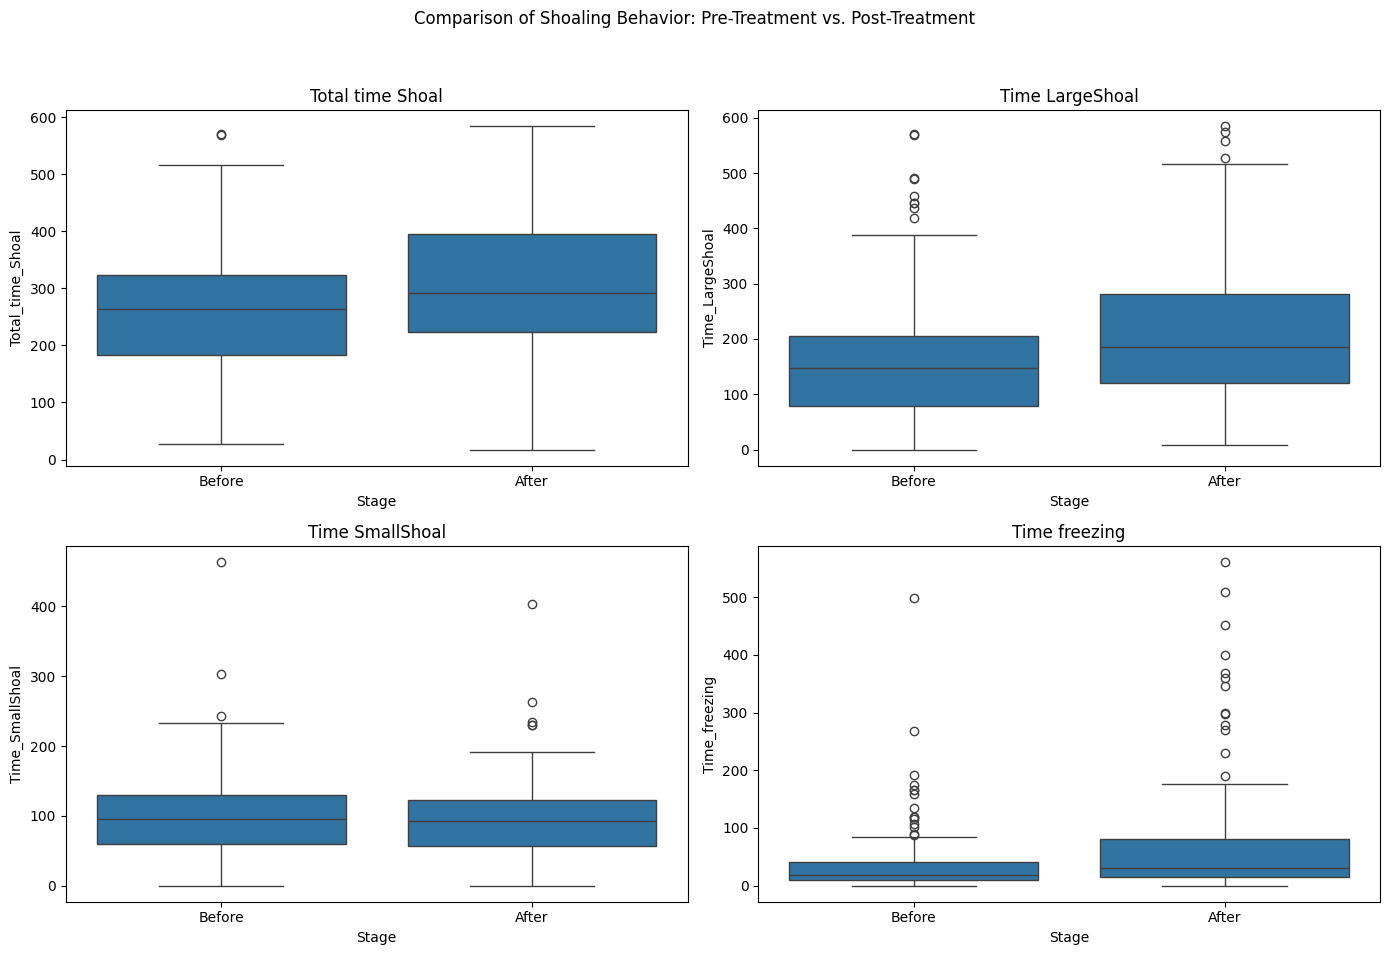

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

pre_treatment_data = data[data['STAGE'] == 'Before']
post_treatment_data = data[data['STAGE'] == 'After']
metrics = ['Total_time_Shoal', 'Time_LargeShoal', 'Time_SmallShoal', 'Time_freezing']
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
fig.suptitle('Comparison of Shoaling Behavior: Pre-Treatment vs. Post-Treatment')
axes = axes.flatten()
for i, metric in enumerate(metrics):
    combined_data = pd.concat([
        pre_treatment_data[[metric]].assign(Stage='Before'),
        post_treatment_data[[metric]].assign(Stage='After')
    ]) 
    sns.boxplot(ax=axes[i], data=combined_data, x='Stage', y=metric)
    axes[i].set_title(metric.replace('_', ' '))
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## compare pre-treatment and post-treatment behaviors across two treatment types (Group and Solitary)

In [5]:
from scipy.stats import ttest_ind
def perform_t_test(metric, treatment_type):
    pre_data = pre_treatment_data[pre_treatment_data['TREATMENT'] == treatment_type][metric]
    post_data = post_treatment_data[post_treatment_data['TREATMENT'] == treatment_type][metric]
    t_stat, p_value = ttest_ind(pre_data, post_data, equal_var=False)  
    return t_stat, p_value
treatment_types = ['Group', 'Solitary']
analysis_results = {}
for metric in metrics:
    for treatment_type in treatment_types:
        t_stat, p_value = perform_t_test(metric, treatment_type)
        analysis_results[(metric, treatment_type)] = {'T-Statistic': t_stat, 'P-Value': p_value}
analysis_results_df = pd.DataFrame.from_dict(analysis_results, orient='index')
analysis_results_df.index.names = ['Metric', 'Treatment Type']
analysis_results_df


T-Statistic       P-Value
Metric           Treatment Type                           
Total_time_Shoal Group             -0.358382  7.204047e-01
                 Solitary          -5.704841  7.436546e-08
Time_LargeShoal  Group             -1.475171  1.416106e-01
                 Solitary          -4.786629  4.650076e-06
Time_SmallShoal  Group              2.379108  1.826675e-02
                 Solitary          -1.500020  1.360474e-01
Time_freezing    Group             -2.509703  1.286417e-02
                 Solitary          -2.780476  6.473978e-03

##  how different arenas impact the amount of time that individuals spend in a large or small shoal

In [6]:
arena_metrics = ['Time_LargeShoal', 'Time_SmallShoal', 'Front_entries', 'Back_entries']
arena_impact = data.groupby('ARENA')[arena_metrics].mean()
arena_impact


,Time_LargeShoal,Time_SmallShoal,Front_entries,Back_entries
ARENA,,,,
1,201.280386,102.691000,12.526316,11.771930
2,184.216714,92.008321,11.571429,10.500000
3,195.879226,110.289065,11.080645,11.032258
4,196.697035,91.480035,12.596491,12.122807
5,171.809763,94.705254,13.305085,12.593220
6,182.543848,82.171303,12.363636,12.424242


## the effects of social context on individual variation in shoaling behaviour among stickleback populations

In [7]:
treatment_impact_metrics = ['Time_LargeShoal', 'Time_SmallShoal', 'Front_entries', 'Back_entries', 'Time_freezing']
treatment_impact = data.groupby('TREATMENT')[treatment_impact_metrics].mean()
treatment_impact


,Time_LargeShoal,Time_SmallShoal,Front_entries,Back_entries,Time_freezing
TREATMENT,,,,,
Group,180.362559,93.525300,12.013636,11.063636,55.661773
Solitary,201.826774,98.492606,12.591241,12.868613,44.599606


# Determining Heterogenous Treatment Affects

### Subgroup Analysis

In [8]:
arena_sizes = data['ARENA'].unique()
subgroup_results = {}
for arena in sorted(arena_sizes):
    arena_data = data[data['ARENA'] == arena]
    metrics_mean = arena_data.groupby('TREATMENT')[['Time_LargeShoal', 'Time_SmallShoal', 'Front_entries', 'Back_entries']].mean()
    subgroup_results[f'ARENA {arena}'] = metrics_mean

subgroup_results_df = pd.concat(subgroup_results, axis=0)
subgroup_results_df


Time_LargeShoal  Time_SmallShoal  Front_entries  \
        TREATMENT                                                    
ARENA 1 Group           205.041000        89.844824      11.735294   
        Solitary        195.721217       121.681000      13.695652   
ARENA 2 Group           191.953500        90.442250      10.142857   
        Solitary        176.479929        93.574393      13.000000   
ARENA 3 Group           163.038176       103.395765      10.764706   
        Solitary        235.757643       118.659500      11.464286   
ARENA 4 Group           190.021186        95.261698      12.976744   
        Solitary        217.201429        79.864929      11.428571   
ARENA 5 Group           158.030767        97.985395      14.139535   
        Solitary        208.840812        85.889875      11.062500   
ARENA 6 Group           179.582605        83.246789      11.263158   
        Solitary        186.562679        80.711714      13.857143   

                   Back_entries  
        TREATMENT                
ARENA 1 Group         11.147059  
        Solitary      12.695652  
ARENA 2 Group          9.678571  
        Solitary      11.321429  
ARENA 3 Group          9.264706  
        Solitary      13.178571  
ARENA 4 Group         12.046512  
        Solitary      12.357143  
ARENA 5 Group         12.372093  
        Solitary      13.187500  
ARENA 6 Group         11.026316  
        Solitary      14.321429

# "STAGE": The stage of the fish's life cycle as moderator 

In [9]:
life_stages = data['STAGE'].unique()
subgroup_stage_results = {}
for stage in life_stages:
    stage_data = data[data['STAGE'] == stage]
    
    metrics_mean_stage = stage_data.groupby('TREATMENT')[['Time_LargeShoal', 'Time_SmallShoal', 'Front_entries', 'Back_entries']].mean()
    subgroup_stage_results[f'STAGE {stage}'] = metrics_mean_stage
subgroup_stage_results_df = pd.concat(subgroup_stage_results, axis=0)
subgroup_stage_results_df


Time_LargeShoal  Time_SmallShoal  Front_entries  \
             TREATMENT                                                    
STAGE After  Group           191.874432        84.572703      11.440678   
             Solitary        240.378055       104.996548      13.013699   
STAGE Before Group           167.044902       103.882225      12.676471   
             Solitary        157.854219        91.074047      12.109375   

                        Back_entries  
             TREATMENT                
STAGE After  Group         10.711864  
             Solitary      14.328767  
STAGE Before Group         11.470588  
             Solitary      11.203125

## Machine Learning Techniques in examining heterogenous treatment affects


##### preparing the data and splitting it into training and testing sets, using a boosting algorithm (Gradient Boosting)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
X = data[['ARENA', 'TREATMENT', 'STAGE']]
X = pd.get_dummies(X, drop_first=True)
y = data['Total_time_Shoal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
gbr = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mse, r2


(12671.19778324807, 0.04497722427915862)

### Feature Emportance 

In [11]:
feature_importances = pd.Series(gbr.feature_importances_, index=X.columns).sort_values(ascending=False)

feature_importances


STAGE_Before          0.369051
ARENA                 0.349961
TREATMENT_Solitary    0.280988
dtype: float64

## Refining the model 

 Incorporating more variables

In [12]:
# Incorporating more variables into the model
X_enhanced = data[['ARENA', 'TREATMENT', 'STAGE', 'Front_entries', 'Back_entries', 'Time_LargeShoal', 'Time_SmallShoal']]
X_enhanced = pd.get_dummies(X_enhanced, drop_first=True)  # One-hot encoding categorical variables

X_train_enhanced, X_test_enhanced, y_train, y_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

gbr_enhanced = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gbr_enhanced.fit(X_train_enhanced, y_train)
y_pred_enhanced = gbr_enhanced.predict(X_test_enhanced)
mse_enhanced = mean_squared_error(y_test, y_pred_enhanced)
r2_enhanced = r2_score(y_test, y_pred_enhanced)
mse_enhanced, r2_enhanced


(251.7897686133066, 0.9810227124670807)

##  Feature Importance Analysis 

In [13]:
feature_importances_enhanced = pd.Series(gbr_enhanced.feature_importances_, index=X_enhanced.columns).sort_values(ascending=False)

feature_importances_enhanced


Time_LargeShoal       0.832864
Time_SmallShoal       0.165270
Back_entries          0.001028
Front_entries         0.000590
ARENA                 0.000176
STAGE_Before          0.000047
TREATMENT_Solitary    0.000023
dtype: float64

## Investigating Model Residuals

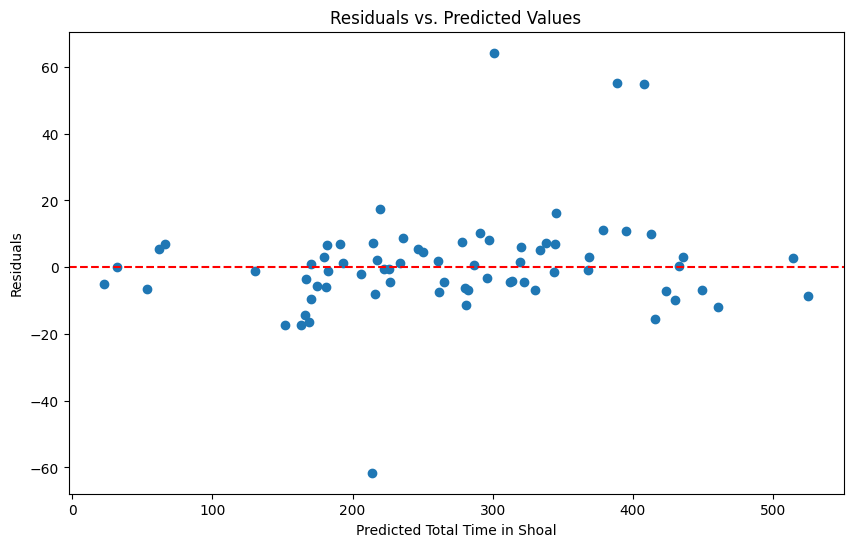

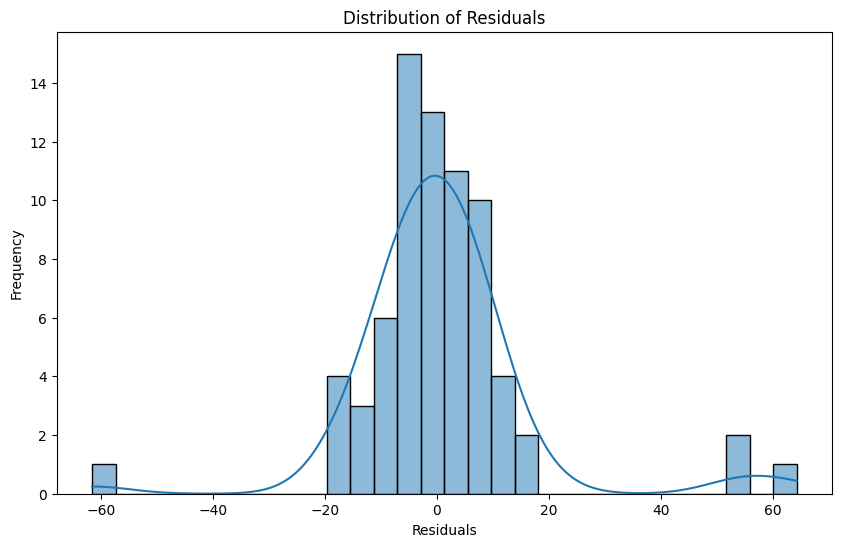

(0.8686143958023176, 15.84409283123245)

In [14]:
import numpy as np
residuals = y_test - y_pred_enhanced
# Plotting residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_enhanced, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Total Time in Shoal')
plt.ylabel('Residuals')
plt.show()
# Plotting the distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, bins=30, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
residuals_mean = np.mean(residuals)
residuals_std = np.std(residuals)
residuals_mean, residuals_std
